In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
dataset_train['Close'] = dataset_train['Close'].str.replace(',', '')

In [5]:
training_set = dataset_train.iloc[:, 4:5].values

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [8]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1198, 60)

In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train.shape

(1198, 60, 1)

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [35]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [36]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [26]:
# Compiling the RNN - RMSprop optimizer
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0242A: 1s - lo
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0080
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0076
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0066A: 1s - - ETA: 0s - loss: 0.006
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0054A:
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0067
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0042A: 1s - los - ETA: 0s - los
Epoc

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014A: 0s - loss: 0.001
Epoch 93/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013
Epoch 94/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0018
Epoch 95/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016A:
Epoch 97/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0017A: 


In [27]:
# Getting the real stock price
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values

In [28]:
real_stock_price

array([[786.14],
       [786.9 ],
       [794.02],
       [806.15],
       [806.65],
       [804.79],
       [807.91],
       [806.36],
       [807.88],
       [804.61],
       [806.07],
       [802.17],
       [805.02],
       [819.31],
       [823.87],
       [835.67],
       [832.15],
       [823.31],
       [802.32],
       [796.79]])

In [29]:
len(dataset_test)

20

In [30]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [31]:
inputs.shape

(80, 1)

In [32]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [33]:
predicted_stock_price

array([[782.49365],
       [783.6547 ],
       [787.6359 ],
       [793.7932 ],
       [803.419  ],
       [810.28534],
       [812.0528 ],
       [812.6395 ],
       [811.93176],
       [811.8362 ],
       [810.5855 ],
       [810.27905],
       [808.7785 ],
       [808.94214],
       [816.3401 ],
       [825.1039 ],
       [835.76697],
       [840.5341 ],
       [836.55786],
       [821.30145]], dtype=float32)

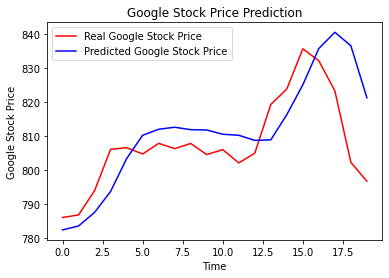

In [34]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()